This notebook is the illustration to the work https://arxiv.org/abs/2407.04852

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.special as sp
from mpmath import *
mp.pretty = True

Consider the Toeplitz determinant of cylinder functions:
$$
\Delta_n(x,\alpha)=\det\left(\left\{\mathcal{C}_{\frac{\alpha}{2}-j+k}(x)\right\}_{j,k=0}^{n-1}\right), \quad n\in\mathbb{N}
$$
with
$$
         \mathcal{C}_{\nu}(x)=d_1J_\nu(x)+d_2Y_{\nu}(x),\quad d_1, d_2\in\mathbb{C},
  $$
  and $J_{\nu}(x)$, $Y_\nu(x)$ are Bessel functions of first and second kinds. In addition, denote $\Delta_0(x,\alpha)=1$. 

The expression 
$$
u_n(x,\alpha)=-\frac{\Delta_{n+1}(x,\alpha-2)\Delta_n(x,\alpha)}{\Delta_{n+1}(x,\alpha)\Delta_n(x,\alpha-2)},\quad n\in \mathbb{N}\cup \{0\},\quad \alpha\in\mathbb{C}
$$
solves the Painlevé III equation
$$
u_n''=\dfrac{\left( u_n'\right)^2}{u_n}-\dfrac{u_n'}{x}  + \dfrac{(\alpha+2n)u_n^2 + (-\alpha+2+2n)}{x}+u_n^3-\frac{1}{u_n}.
$$

We introduce the definitions of special function solutions.

In [ ]:
def f(n,x,d1,d2):
  return d1*jv(n,x)+d2*yv(n,x)
def M(n, x, alpha, d1, d2,N,K):
  i_values = np.arange(n)[:, None]
  j_values = np.arange(n)[None, :]
  alpha_values = alpha/2 + i_values - j_values
  alpha_values=np.reshape(alpha_values, (1,-1))
  x=np.reshape(x, (-1,1))
  M = f(alpha_values, x, d1, d2)
  M=np.reshape(M, (N,K,n,n))
  return M
def tau(n, x, alpha,d1,d2,N,K):
  return np.linalg.det(M(n,x,alpha,d1,d2,N,K))
def u(n, x, alpha,d1,d2,N,K):
  return -tau(n+1, x, alpha-2,d1,d2,N,K)*tau(n, x, alpha,d1,d2,N,K)/tau(n+1, x, alpha,d1,d2,N,K)/tau(n, x, alpha-2,d1,d2,N,K)

def g(n,x,b1,b2):
  return b1*sp.hankel1(n,x)+b2*sp.hankel2(n,x)
def Minf(n, x, alpha,b1,b2,N,K):
  i_values = np.arange(n)[:, None]
  j_values = np.arange(n)[None, :]
  alpha_values = alpha/2 + i_values - j_values
  alpha_values=np.reshape(alpha_values, (1,-1))
  x=np.reshape(x, (-1,1))
  Minf = g(alpha_values, x, b1, b2)
  Minf=np.reshape(Minf, (N,K,n,n))
  return Minf
def tauinf(n, x, alpha,b1,b2,N,K):
  return np.linalg.det(Minf(n,x,alpha,b1,b2,N,K))
def uinf(n, x, alpha,b1,b2,N,K):
  return -tauinf(n+1, x, alpha-2,b1,b2,N,K)*tauinf(n, x, alpha,b1,b2,N,K)/tauinf(n+1, x, alpha,b1,b2,N,K)/tauinf(n, x, alpha-2,b1,b2,N,K)


We produce the grid on the complex plane.

In [ ]:
x = np.linspace(-20, 20, 400) # Real domain.
y = np.linspace(-20, 20, 400) # Imaginary domain.
X, Y = np.meshgrid(x, y) # Make grid matrices.
Z = X + 1j*Y

We introduce the function to evaluate the complex phases of the function on the grid in the complex plane.

In [ ]:
def U(n,x,alpha,d1,d2,N,K):
  return np.angle(u(n, x, alpha,d1,d2,N,K))

def Uinf(n,x,alpha,b1,b2,N,K):
  return np.angle(uinf(n, x, alpha,b1,b2,N,K))

Illustration of colors

CPU times: user 63.3 ms, sys: 9 ms, total: 72.3 ms
Wall time: 70.2 ms


Text(0, 0.5, 'Im(x)')

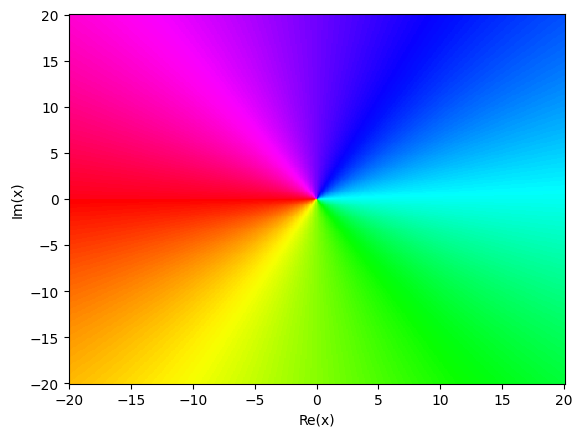

In [ ]:
%%time
fig, axs = plt.subplots()
plt.hsv()
plt.pcolormesh(X,Y,np.angle(Z),vmin=-np.pi,vmax=np.pi)
plt.xlabel("Re(x)")
plt.ylabel("Im(x)")

Small alpha large n.

CPU times: user 14min 52s, sys: 9.01 s, total: 15min 1s
Wall time: 15min 2s


Text(0, 0.5, 'Im(x)')

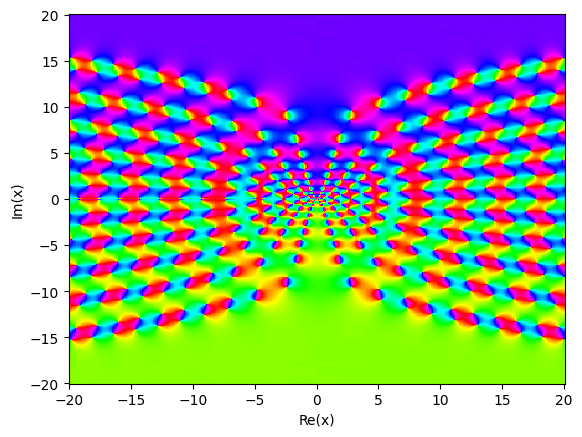

In [ ]:
%%time
fig, axs = plt.subplots()
plt.hsv()
plt.pcolormesh(X,Y,U(10,Z,25/27,55/100,71/100,400,400).real,vmin=-np.pi,vmax=np.pi)
plt.xlabel("Re(x)")
plt.ylabel("Im(x)")

Small alpha, large n, d2=0.

CPU times: user 15min, sys: 8.46 s, total: 15min 8s
Wall time: 15min 9s


Text(0, 0.5, 'Im(x)')

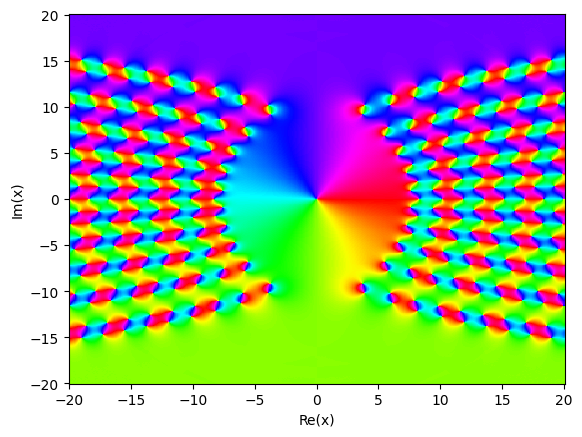

In [ ]:
%%time
fig, axs = plt.subplots()
plt.hsv()
plt.pcolormesh(X,Y,U(10,Z,25/27,55/100,0,400,400).real,vmin=-np.pi,vmax=np.pi)
plt.xlabel("Re(x)")
plt.ylabel("Im(x)")

Small alpha, large n, d1+i*d2=0

CPU times: user 4min 8s, sys: 1.25 s, total: 4min 9s
Wall time: 4min 11s


Text(0, 0.5, 'Im(x)')

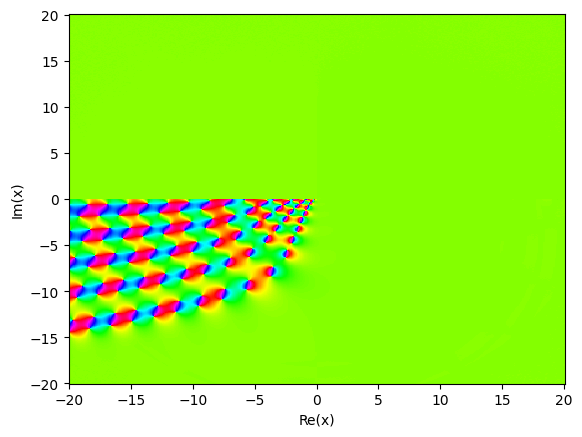

In [ ]:
%%time
fig, axs = plt.subplots()
plt.hsv()
plt.pcolormesh(X,Y,Uinf(10,Z,25/27,55/100,0,400,400).real,vmin=-np.pi,vmax=np.pi)
plt.xlabel("Re(x)")
plt.ylabel("Im(x)")

In [ ]:
x = np.linspace(-30, 30, 600) # Real domain.
y = np.linspace(-30, 30, 600) # Imaginary domain.
X, Y = np.meshgrid(x, y) # Make grid matrices.
Z = X + 1j*Y

Large n, large alpha

<ipython-input-154-97bd2993ee14>:15: RuntimeWarning: overflow encountered in multiply
  return -tau(n+1, x, alpha-2,d1,d2,N,K)*tau(n, x, alpha,d1,d2,N,K)/tau(n+1, x, alpha,d1,d2,N,K)/tau(n, x, alpha-2,d1,d2,N,K)
<ipython-input-154-97bd2993ee14>:15: RuntimeWarning: invalid value encountered in divide
  return -tau(n+1, x, alpha-2,d1,d2,N,K)*tau(n, x, alpha,d1,d2,N,K)/tau(n+1, x, alpha,d1,d2,N,K)/tau(n, x, alpha-2,d1,d2,N,K)


CPU times: user 15min 27s, sys: 3.05 s, total: 15min 30s
Wall time: 15min 33s


Text(0, 0.5, 'Im(x)')

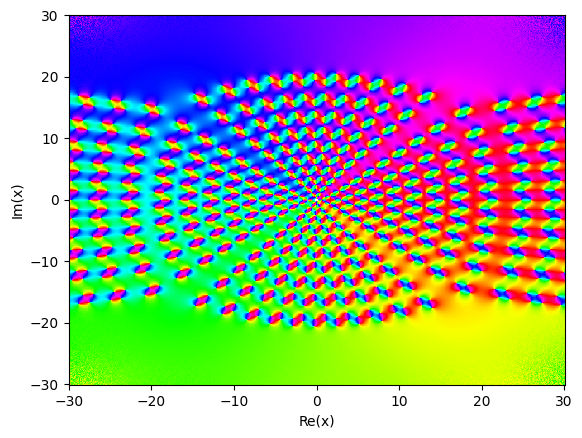

In [ ]:
%%time
fig, axs = plt.subplots()
plt.hsv()
plt.pcolormesh(X,Y,U(10,Z,576/25,55/100,71/100,600,600).real,vmin=-np.pi,vmax=np.pi)
plt.xlabel("Re(x)")
plt.ylabel("Im(x)")

Small n, large alpha.

In [ ]:
x = np.linspace(-50, 50, 1000) # Real domain.
y = np.linspace(-50, 50, 1000) # Imaginary domain.
X, Y = np.meshgrid(x, y) # Make grid matrices.
Z = X + 1j*Y
N=len(x);

<ipython-input-154-97bd2993ee14>:31: RuntimeWarning: overflow encountered in multiply
  return -tauinf(n+1, x, alpha-2,b1,b2,N,K)*tauinf(n, x, alpha,b1,b2,N,K)/tauinf(n+1, x, alpha,b1,b2,N,K)/tauinf(n, x, alpha-2,b1,b2,N,K)
<ipython-input-154-97bd2993ee14>:31: RuntimeWarning: invalid value encountered in multiply
  return -tauinf(n+1, x, alpha-2,b1,b2,N,K)*tauinf(n, x, alpha,b1,b2,N,K)/tauinf(n+1, x, alpha,b1,b2,N,K)/tauinf(n, x, alpha-2,b1,b2,N,K)
<ipython-input-154-97bd2993ee14>:31: RuntimeWarning: overflow encountered in divide
  return -tauinf(n+1, x, alpha-2,b1,b2,N,K)*tauinf(n, x, alpha,b1,b2,N,K)/tauinf(n+1, x, alpha,b1,b2,N,K)/tauinf(n, x, alpha-2,b1,b2,N,K)
<ipython-input-154-97bd2993ee14>:31: RuntimeWarning: invalid value encountered in divide
  return -tauinf(n+1, x, alpha-2,b1,b2,N,K)*tauinf(n, x, alpha,b1,b2,N,K)/tauinf(n+1, x, alpha,b1,b2,N,K)/tauinf(n, x, alpha-2,b1,b2,N,K)


CPU times: user 35min 34s, sys: 8.4 s, total: 35min 43s
Wall time: 35min 51s


Text(0, 0.5, 'Im(x)')

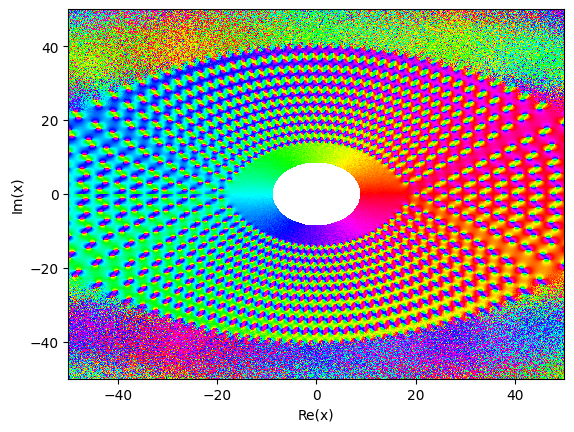

In [ ]:
%%time
fig, axs = plt.subplots()
plt.hsv()
plt.pcolormesh(X,Y,Uinf(10,Z,2001/25,(55/100-1j*71/100)/2,(55/100+1j*71/100)/2,1000,1000).real,vmin=-np.pi,vmax=np.pi)
plt.xlabel("Re(x)")
plt.ylabel("Im(x)")

We introduce coefficients appearing in the asymptotics.

Determinant at infinity

In [ ]:
def Codd(n,d1,d2):
  return np.power(-1,(n - 1)/2)*np.power((np.square(d1) + np.square(d2))/(2*np.pi),n/2)*np.power(4,(np.square(n) + 1)/
    4)*(barnesg((n + 1)/2))*(barnesg((n + 3)/2))

def Ceven(n,d1,d2):
  return np.power((np.square(d1) + np.square(d2))/(2*np.pi),n/2)*np.power(4,np.square(n)/
    4)*np.square(barnesg(n/2 + 1))

Determinant at zero

In [ ]:
def Ca(alpha,n,j,d1,d2):
  return np.power(-1,(n - 1)*n/2 + n*j + n - j)*np.power(d2/np.pi,n)*np.power(d1/d2*sin(np.pi*alpha/2)+cos(np.pi*alpha/2),j)\
  *barnesg(n-j+1)*barnesg(n-j+1-alpha/2)*barnesg(j+1)*barnesg(j+1+alpha/2)/barnesg(n-j*2+1-alpha/2)\
  /barnesg(-n+2*j+1+alpha/2)*np.power(2,alpha*n/2-j*(alpha-2*n+2*j))

Solution at zero

In [ ]:

def r(alpha,n,j,d1,d2):
  return np.power(-1,n)*np.power(2,2*n-4*j-alpha+1)*(d1/d2*sin(np.pi*alpha/2)+cos(np.pi*alpha/2))\
  *np.square(gamma(-alpha/2+n-2*j+1))/gamma(n-j-alpha/2+1)/gamma(n-j+1)*gamma(alpha/2+j)\
  /np.square(gamma(alpha/2-n+2*j))*gamma(j+1)

def s(alpha,n,j,d1,d2):
  return np.power(-1,n)*np.power(2,-2*n+4*j+alpha-1)/(d1/d2*sin(np.pi*alpha/2)+cos(np.pi*alpha/2))\
  *np.square(gamma(alpha/2-n+2*j+1))*gamma(n-j-alpha/2+1)*gamma(n-j)*gamma(alpha/2+j+1)\
  /np.square(gamma(-alpha/2+n-2*j))/gamma(j+1)

In [ ]:
x = np.linspace(1e-6, 1e-3, 1000) # Real domain.

We compute the solution on the grid on the real line.

CPU times: user 301 ms, sys: 0 ns, total: 301 ms
Wall time: 295 ms


/usr/local/lib/python3.10/dist-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


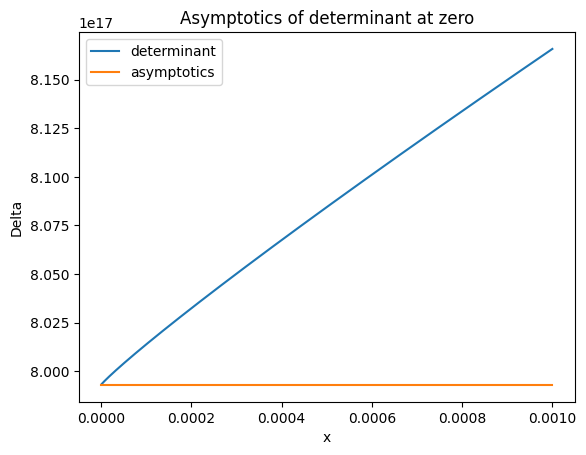

In [ ]:
%%time
plt.plot(x, np.power(x,50)*tau(10,x,1.08,0.55,0.71,1000,1).reshape(-1),label="determinant")
plt.plot(x, np.full(1000, Ca(1.08,10,5,0.55,0.71)),label="asymptotics")
plt.xlabel('x')
plt.ylabel('Delta')
plt.title('Asymptotics of determinant at zero')
plt.legend()

In [ ]:
x = np.linspace(200, 1000, 1000) # Real domain.

CPU times: user 334 ms, sys: 1.63 ms, total: 336 ms
Wall time: 334 ms


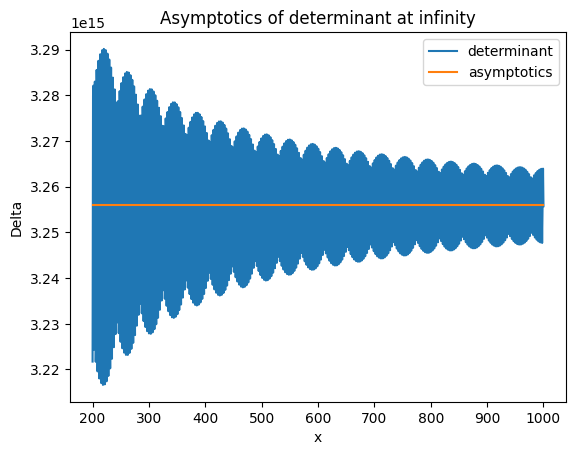

In [ ]:
%%time
plt.plot(x, np.power(x,25)*tau(10,x,1.08,0.55,0.71,1000,1).reshape(-1),label="determinant")
plt.plot(x, np.full(1000, Ceven(10,0.55,0.71)),label="asymptotics")
plt.xlabel('x')
plt.ylabel('Delta')
plt.title('Asymptotics of determinant at infinity')
plt.legend()

In [ ]:
x = np.linspace(1e-3, 1e-2, 1000) # Real domain.

<ipython-input-154-97bd2993ee14>:15: RuntimeWarning: overflow encountered in multiply
  return -tau(n+1, x, alpha-2,d1,d2,N,K)*tau(n, x, alpha,d1,d2,N,K)/tau(n+1, x, alpha,d1,d2,N,K)/tau(n, x, alpha-2,d1,d2,N,K)


CPU times: user 1.27 s, sys: 4.99 ms, total: 1.27 s
Wall time: 1.28 s


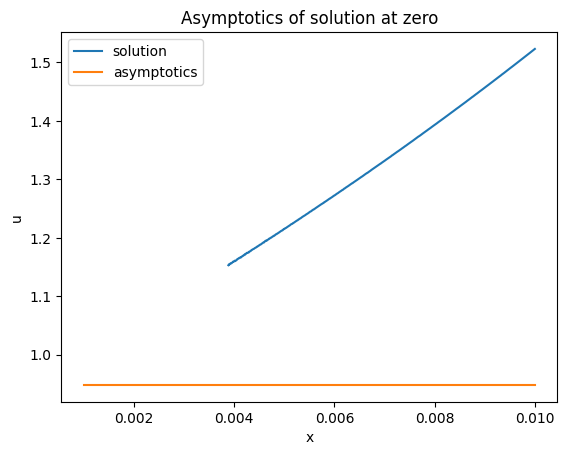

In [ ]:
%%time
plt.plot(x, 1/np.power(x,0.08)*u(10,x,1.08,0.55,0.71,1000,1).reshape(-1),label="solution")
plt.plot(x, np.full(1000, r(1.08,10,5,0.55,0.71)),label="asymptotics")
plt.xlabel('x')
plt.ylabel('u')
plt.title('Asymptotics of solution at zero')
plt.legend()

In [ ]:
x = np.linspace(200, 210, 1000) # Real domain.


CPU times: user 1.39 s, sys: 8 ms, total: 1.4 s
Wall time: 1.4 s


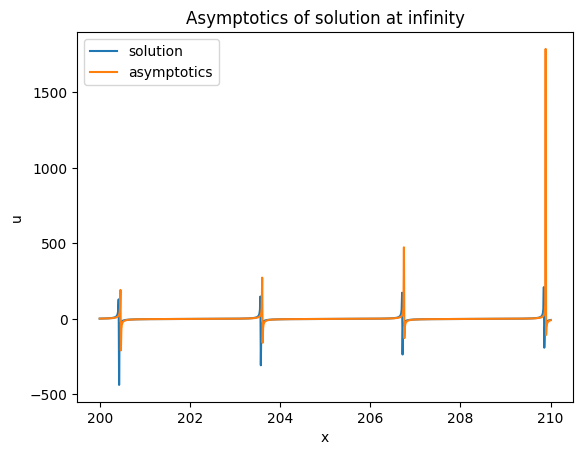

In [ ]:
%%time
plt.plot(x, u(10,x,1.08,0.55,0.71,1000,1).reshape(-1),label="solution")
plt.plot(x, -1/np.tan(x-np.angle(0.55+1j*0.71)+np.pi/4*(11-1.08)),label="asymptotics")
plt.xlabel('x')
plt.ylabel('u')
plt.title('Asymptotics of solution at infinity')
plt.legend()